In [38]:
import numpy as np
import matplotlib.pyplot as plt

max_x = 2.0
max_y = 2.0
n = 50

x_range = np.linspace(-max_x, max_x, n)
y_range = np.linspace(-max_y, max_y, n)
x_grid, y_grid = np.meshgrid(x_range, y_range)
t = 0

In [39]:
def phase_portret(x_grid, y_grid):
    nx = x_grid.shape
    ny = y_grid.shape
    u, v = np.zeros(nx), np.zeros(ny)

    for i in range(nx[0]):
        for j in range(ny[0]):
            x = x_grid[i, j]
            y = y_grid[i, j]
            derivative_vector = function([x, y], t)
            u[i, j] = derivative_vector[0]
            v[i, j] = derivative_vector[1]
    return [x_grid, y_grid, u, v]


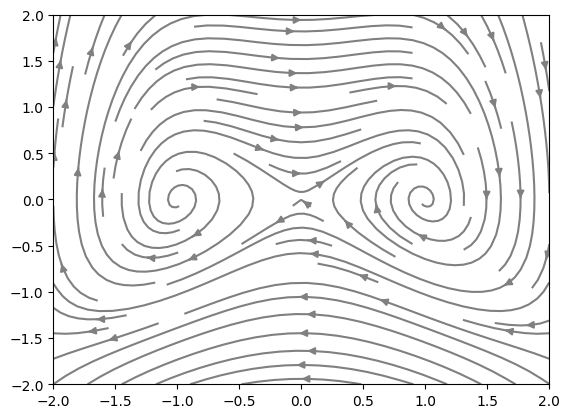

In [40]:
from scipy.integrate import odeint

def function(p, t):
    a = 0.5
    x, y = p
    return y, x-(1+a*np.cos(2*t)*y)*x**3

# plt.xlim([-max_x, max_x])
# plt.ylim([-max_y, max_y])
# plt.title("Phase Portrait for system x\" = x^3 - x ")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(['solution trajectory', 'strart', 'finish', 'fixed point'],  loc="best")
plt.streamplot(*phase_portret(x_grid, y_grid), color='grey')

(-2.0, 6.0)
(-2.0, 5.141480165577267)
(-2.0, 4.359663065559419)
(-2.0, 3.651284753801562)
(-2.0, 3.013081284158812)
(-2.0, 2.441788710486277)
(-2.0, 1.9341430866390699)
(-2.0, 1.4868804664723034)
(-2.0, 1.0967369038410872)
(-2.0, 0.7604484526005324)
(-2.0, 0.4747511666057509)
(-2.0, 0.23638109971185495)
(-2.0, 0.04207430577395477)
(-2.0, -0.11143316135283743)
(-2.0, -0.22740524781341098)
(-2.0, -0.3091058997526539)
(-2.0, -0.35979906331545525)
(-2.0, -0.3827486846467033)
(-2.0, -0.3812187098912868)
(-2.0, -0.3584730851940943)
(-2.0, -0.31777575670001457)
(-2.0, -0.26239067055393595)
(-2.0, -0.19558177290074732)
(-2.0, -0.12061300988533702)
(-2.0, -0.04074832765259378)
(-2.0, 0.04074832765259378)
(-2.0, 0.1206130098853366)
(-2.0, 0.19558177290074694)
(-2.0, 0.2623906705539358)
(-2.0, 0.31777575670001446)
(-2.0, 0.35847308519409415)
(-2.0, 0.38121870989128676)
(-2.0, 0.38274868464670336)
(-2.0, 0.35979906331545536)
(-2.0, 0.3091058997526541)
(-2.0, 0.22740524781341154)
(-2.0, 0.111433161

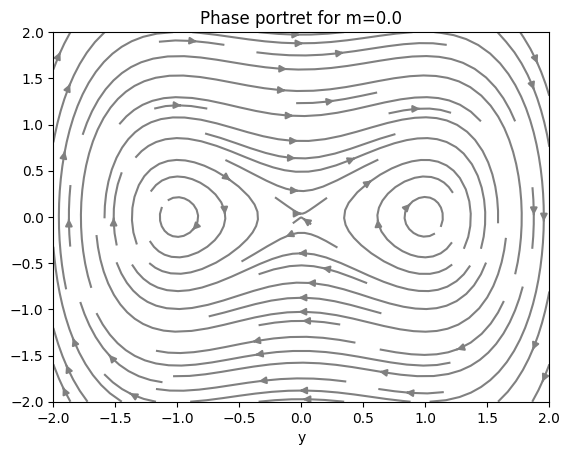

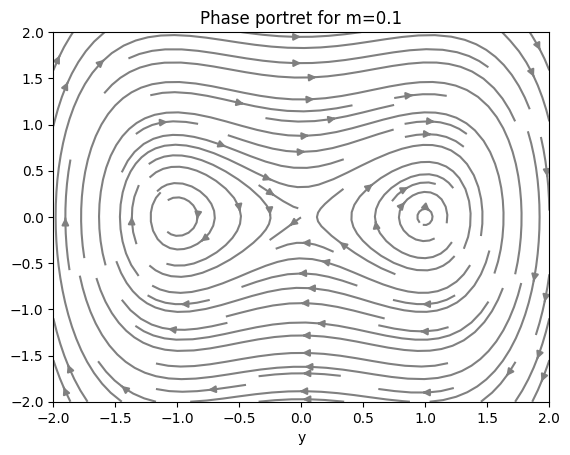

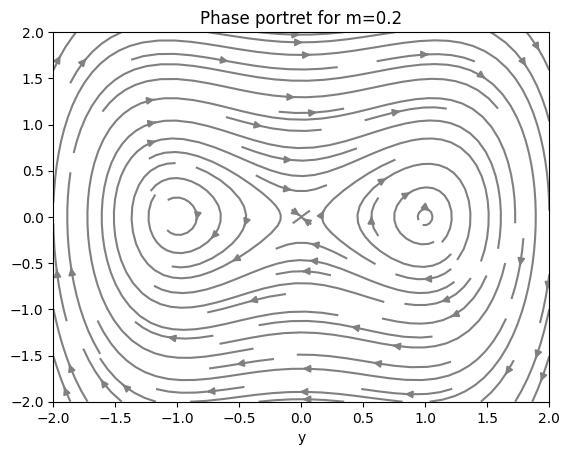

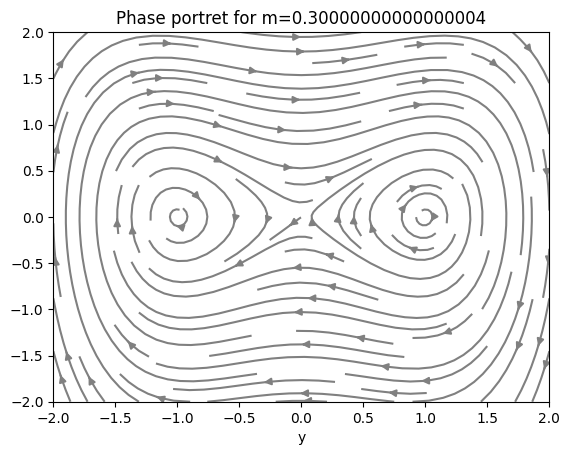

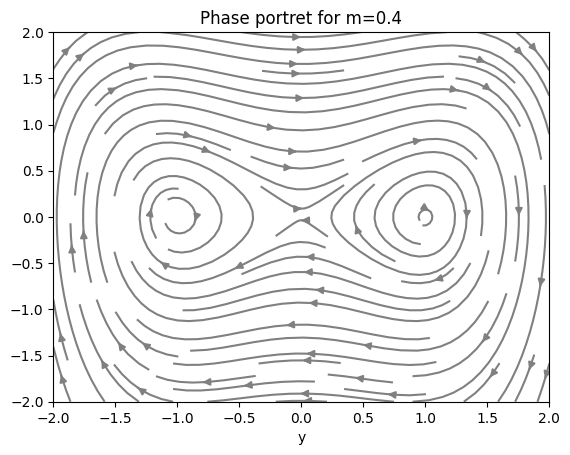

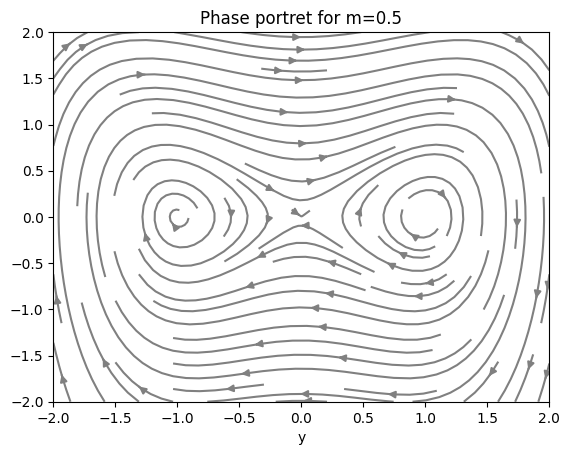

In [170]:
def plot_phase_portret(x_grid, y_grid, function, a):
    nx = x_grid.shape
    ny = y_grid.shape
    u, v = np.zeros(nx), np.zeros(ny)

    for i in range(nx[0]):
        for j in range(ny[0]):
            x = x_grid[i, j]
            y = y_grid[i, j]
            derivative_vector = function([x, y], t, a)
            print(derivative_vector)
            u[i, j] = derivative_vector[0]
            v[i, j] = derivative_vector[1]
    return [x_grid, y_grid, u, v]


a_array = np.arange(0, 0.6, 0.1)

def function(p, t, a):
    x, y = p
    return y, x-(1+a*np.cos(2)*y)*x**3


for a in a_array:
    plt.figure()
    plt.streamplot(*plot_phase_portret(x_grid, y_grid, function, a), color='grey')
    plt.title(f"Phase portret for m={a}")
    plt.xlabel("x")
    plt.xlabel("y")
plt.show()

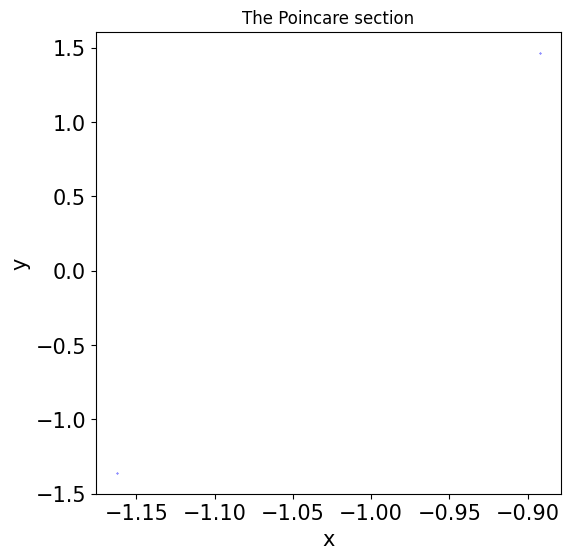

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
t = np.arange(0, 200 * np.pi, np.pi)

def function(p, t):
    a = 0.5
    x, y, z = p
    return y, x-(1+a*np.cos(z)*y)*x**3, 2

xs = odeint(function, [2, 2], t)

x = xs[1]
y = xs[2]

ax.scatter(x, y, color='blue', s=0.1)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('The Poincare section')

plt.show()

/tmp/ipykernel_113623/3064034910.py:8: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(function, p0, t_range, atol=1e-10, rtol=1e-11)
/tmp/ipykernel_113623/3064034910.py:16: RuntimeWarning: invalid value encountered in add
  u = ((u+np.pi/2) % np.pi)-np.pi/2


Text(0.5, 0, 'y')

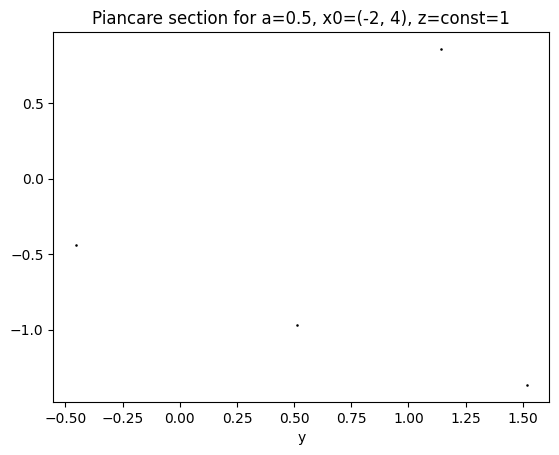

In [221]:
a = 0.5

def function(p, t):
    x,y,z = p
    return y, x-(1+a*np.cos(z)*y)*x**3, 2

def integrate(p0, t_range):
    return odeint(function, p0, t_range, atol=1e-10, rtol=1e-11)

def find_crosssections(x0,y0, z0):
    u0 = [x0,y0,z0]
    px = []
    py = []

    u = integrate(u0, np.arange(0, 4000, 0.1))
    u = ((u+np.pi/2) % np.pi)-np.pi/2
    # print(u)
    x,y,z = u.T

    for k in range(len(z)-1):
        if z[k] <= z0 <= z[k + 1] and z[k + 1]-z[k] < np.pi / 2:
            px.append(x[k])
            py.append(y[k])
    return px,py

x0 = (-2, 4, 1)
plt.scatter(*find_crosssections(*x0),s=0.7, color='black')
plt.title(f"Piancare section for {a=}, x0={x0[:-1]}, z=const={x0[-1]}")
plt.xlabel("x")
plt.xlabel("y")

/tmp/ipykernel_113623/3064034910.py:8: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(function, p0, t_range, atol=1e-10, rtol=1e-11)


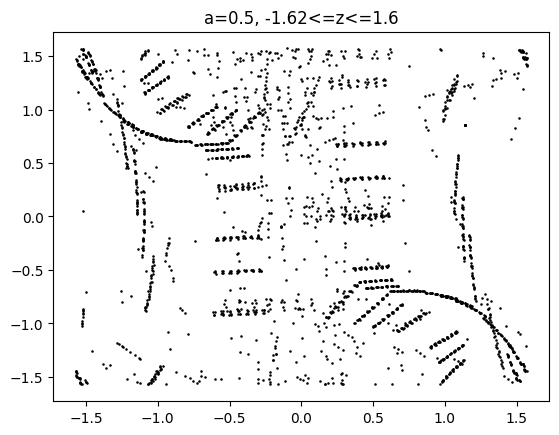

In [222]:
from celluloid import Camera

a = 0.5
camera = Camera(plt.figure())
for z in np.arange(-1.6,1,0.01):
    x0 = [-2, 4, z]
    plt.scatter(*find_crosssections(*x0),s=0.7, color='black')
    camera.snap()
plt.title(f"a=0.5, -1.62<=z<=1.6")
anim = camera.animate(blit=True)
anim.save('scatter2.mp4')

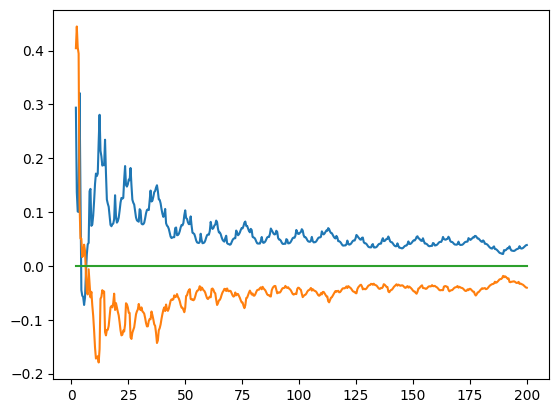

In [97]:
a = 0.5
def diff_Lorenz(u):
    x,y,z = u
    f = [y, x-(1+0.5*np.cos(z)*y)*x**3, 2]
    Df = [[0,1,0],[1-3*(x**2)*(a*y*np.cos(z)+1),-a*(x**3)*np.cos(z),a*(x**3)*y*np.sin(z)],[0,0,0]]
    return np.array(f), np.array(Df)


def LEC_system(u):
    #x,y,z = u[:3]             # n=3
    U = u[3:12].reshape([3,3]) # size n square matrix, sub-array from n to n+n*n=n*(n+1)
    L = u[12:15]               # vector, sub-array from n*(n+1) to n*(n+1)+n=n*(n+2)
    f,Df = diff_Lorenz(u[:3])
    A = U.T.dot(Df.dot(U))
    dL = np.diag(A).copy();
    for i in range(3):
        A[i,i] = 0
        for j in range(i+1,3): A[i,j] = -A[j,i]
    dU = U.dot(A)
    return np.concatenate([f,dU.flatten(),dL])

u0 = np.ones(3)
U0 = np.identity(3)
L0 = np.zeros(3)
u0 = np.concatenate([u0, U0.flatten(), L0])
t = np.linspace(0,200,501)
u = odeint(lambda u,t:LEC_system(u),u0,t, hmax=0.05)
L = u[5:,12:15].T/t[5:]

plt.plot(t[5:],L.T)

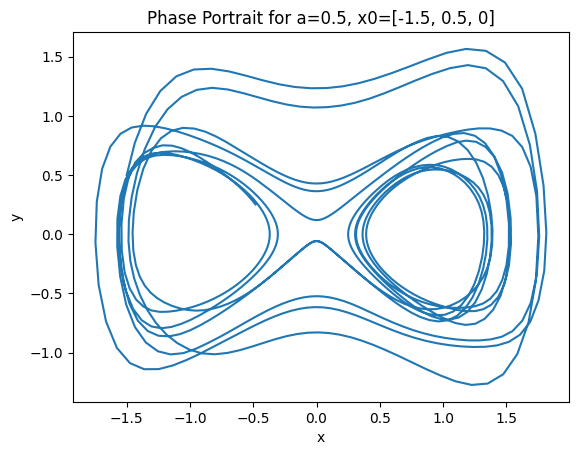

In [181]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of ODEs
def ode_system(t, variables, a):
    x, y, z = variables
    dxdt = y
    dydt = x-(1+a*np.cos(z)*y)*x**3
    dzdt = 2
    return [dxdt, dydt, dzdt]

# Initial conditions
initial_conditions = [-1.5, 0.5, 0]

# Parameter value
a = 0.5

# Time span
t_span = (0, 100)

# Solve the system numerically
sol = solve_ivp(
    fun=lambda t, y: ode_system(t, y, a),
    t_span=t_span,
    y0=initial_conditions,
    method='RK45',
    dense_output=True
)

# Extract the solution
t = np.linspace(t_span[0], t_span[1], 1000)
solution = sol.sol(t)

# Plot the phase portrait
plt.plot(solution[0], solution[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Phase Portrait for {a=}, x0={initial_conditions}')
plt.show()


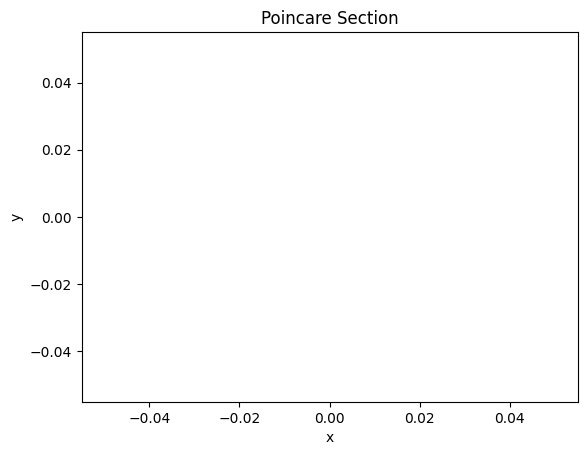

In [55]:

# Function to find Poincare section points
def find_poincare_section_points(solution, T):
    points = []
    for i in range(len(solution[2])-1):
        if abs(solution[2][i] - T) <= 3/100:
            points.append(i)
    return points

# Initial conditions
initial_conditions = [-1.5,1, 0]

# Parameter value
w_value = 1

# Time span
t_span = (0, 100)

# Solve the system numerically
sol = solve_ivp(
    fun=lambda t, y: ode_system(t, y, w_value),
    t_span=t_span,
    y0=initial_conditions,
    method='RK45',
    dense_output=True
)

# Extract the solution
t = np.linspace(t_span[0], t_span[1], 1000)
solution = sol.sol(t)

# Find Poincare section points
T = np.pi
poincare_points = find_poincare_section_points(solution, T)

# Plot Poincare section
plt.plot(solution[0][poincare_points], solution[1][poincare_points], 'o', markersize=7, color='pink')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poincare Section')
plt.show()


-1.1102230246251565e-14
-1.1102230246251565e-14
0.0034382445570822887
0.009372917242663434
0.017807215568252134
0.02874371963595757
0.04217892979952776
0.058121540362115566
0.07657440687283722
0.09755512362188941
0.1210505423187145
0.1470866602538635
0.1756687321348149
0.20681183999991196
0.24051497968605454
0.2768083855761053
0.3156846895336816
0.35715806939683764
0.4012611174812789
0.4479872313855216
0.4973819097511001
0.5494283792732829
0.6041453225993044
0.6616437702267693
0.721784825646335
0.7846716722459243
0.8503057724543176
0.9187401408437335
0.9899505052421561
1.0639743527862793
1.140824634793282
1.2205451696076153
1.3030860174252599
1.3885542728834053
1.476864567537308
1.568140058230195
1.6623878989755507
1.7594812006071519
1.8595997852022164
1.9627110457086834
2.0687254744894368
2.1778600677328668
2.2899451287446
2.405012138213161
2.523227629463853
2.6444093837919223
2.768632130323698
2.8959463700211954
3.0263604215416318
3.1598328281635024
3.296349653564669


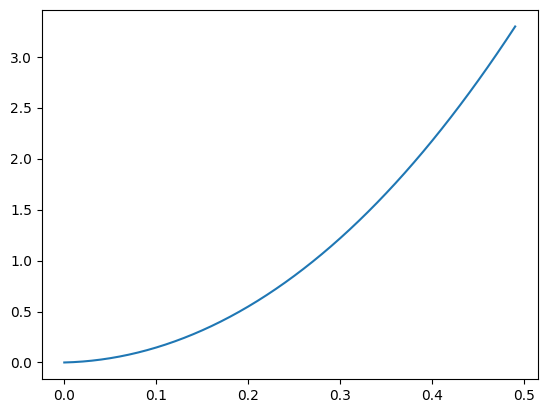

In [71]:
import numpy as np
from scipy.integrate import odeint

def ode_system(u, t, a):
    x, y, z = u
    dxdt = y
    dydt = x - (1 + a * np.cos(z) * y) * x**3
    dzdt = 2.0
    return [dxdt, dydt, dzdt]

def jacobian_matrix(u, a):
    x, y, z = u
    J = np.array([
        [0, 1, 0],
        [1 - 3*a*(x**2)*y*np.cos(z) - a*np.cos(z)*x**3, -a*np.cos(z)*x**3, a*np.sin(z)*y*x**3],
        [0, 0, 0]
    ])
    return J

def normalize_vector(v):
    return v / np.linalg.norm(v)

def lyapunov_exponent(a, u0, num_steps, dt, epsilon):
    state = np.array(u0)
    lyapunov_sum = 0.0

    for step in range(num_steps):
        t = step * dt
        solution = odeint(ode_system, state, [t, t + dt], args=(a,))
        x_t, x_t_dt = solution

        J_t = jacobian_matrix(x_t, a)
        J_t_dt = jacobian_matrix(x_t_dt, a)

        lyapunov_sum += np.log(np.linalg.norm(J_t_dt @ normalize_vector(J_t @ np.eye(3))))

        state = x_t_dt + epsilon * normalize_vector(np.random.rand(3))

    return lyapunov_sum / (num_steps * dt)

# Parameters
a_array = np.arange(0,0.5,0.01)
initial_state = [1.0, 0.0, 0.0]
num_steps = 10000
dt = 0.01
epsilon = 1e-6



print(lyapunov_exponent(0, initial_state, num_steps, dt, epsilon))
# Compute Lyapunov Exponent
l = []
for a in a_array:
    l.append(lyapunov_exponent(a, initial_state, num_steps, dt, epsilon))
    print(l[-1])
plt.plot(a_array,l)
